## Prdiction of the back pain using Logistic Regression

In [110]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [111]:
back_data = pd.read_csv('Dataset_spine.csv')

In [112]:
back_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [4]:
back_data.shape

(310, 14)

In [5]:
back_data.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

In [113]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope', 'status']

In [114]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [15]:
back_data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


In [17]:
back_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
305    False
306    False
307    False
308    False
309    False
Length: 310, dtype: bool

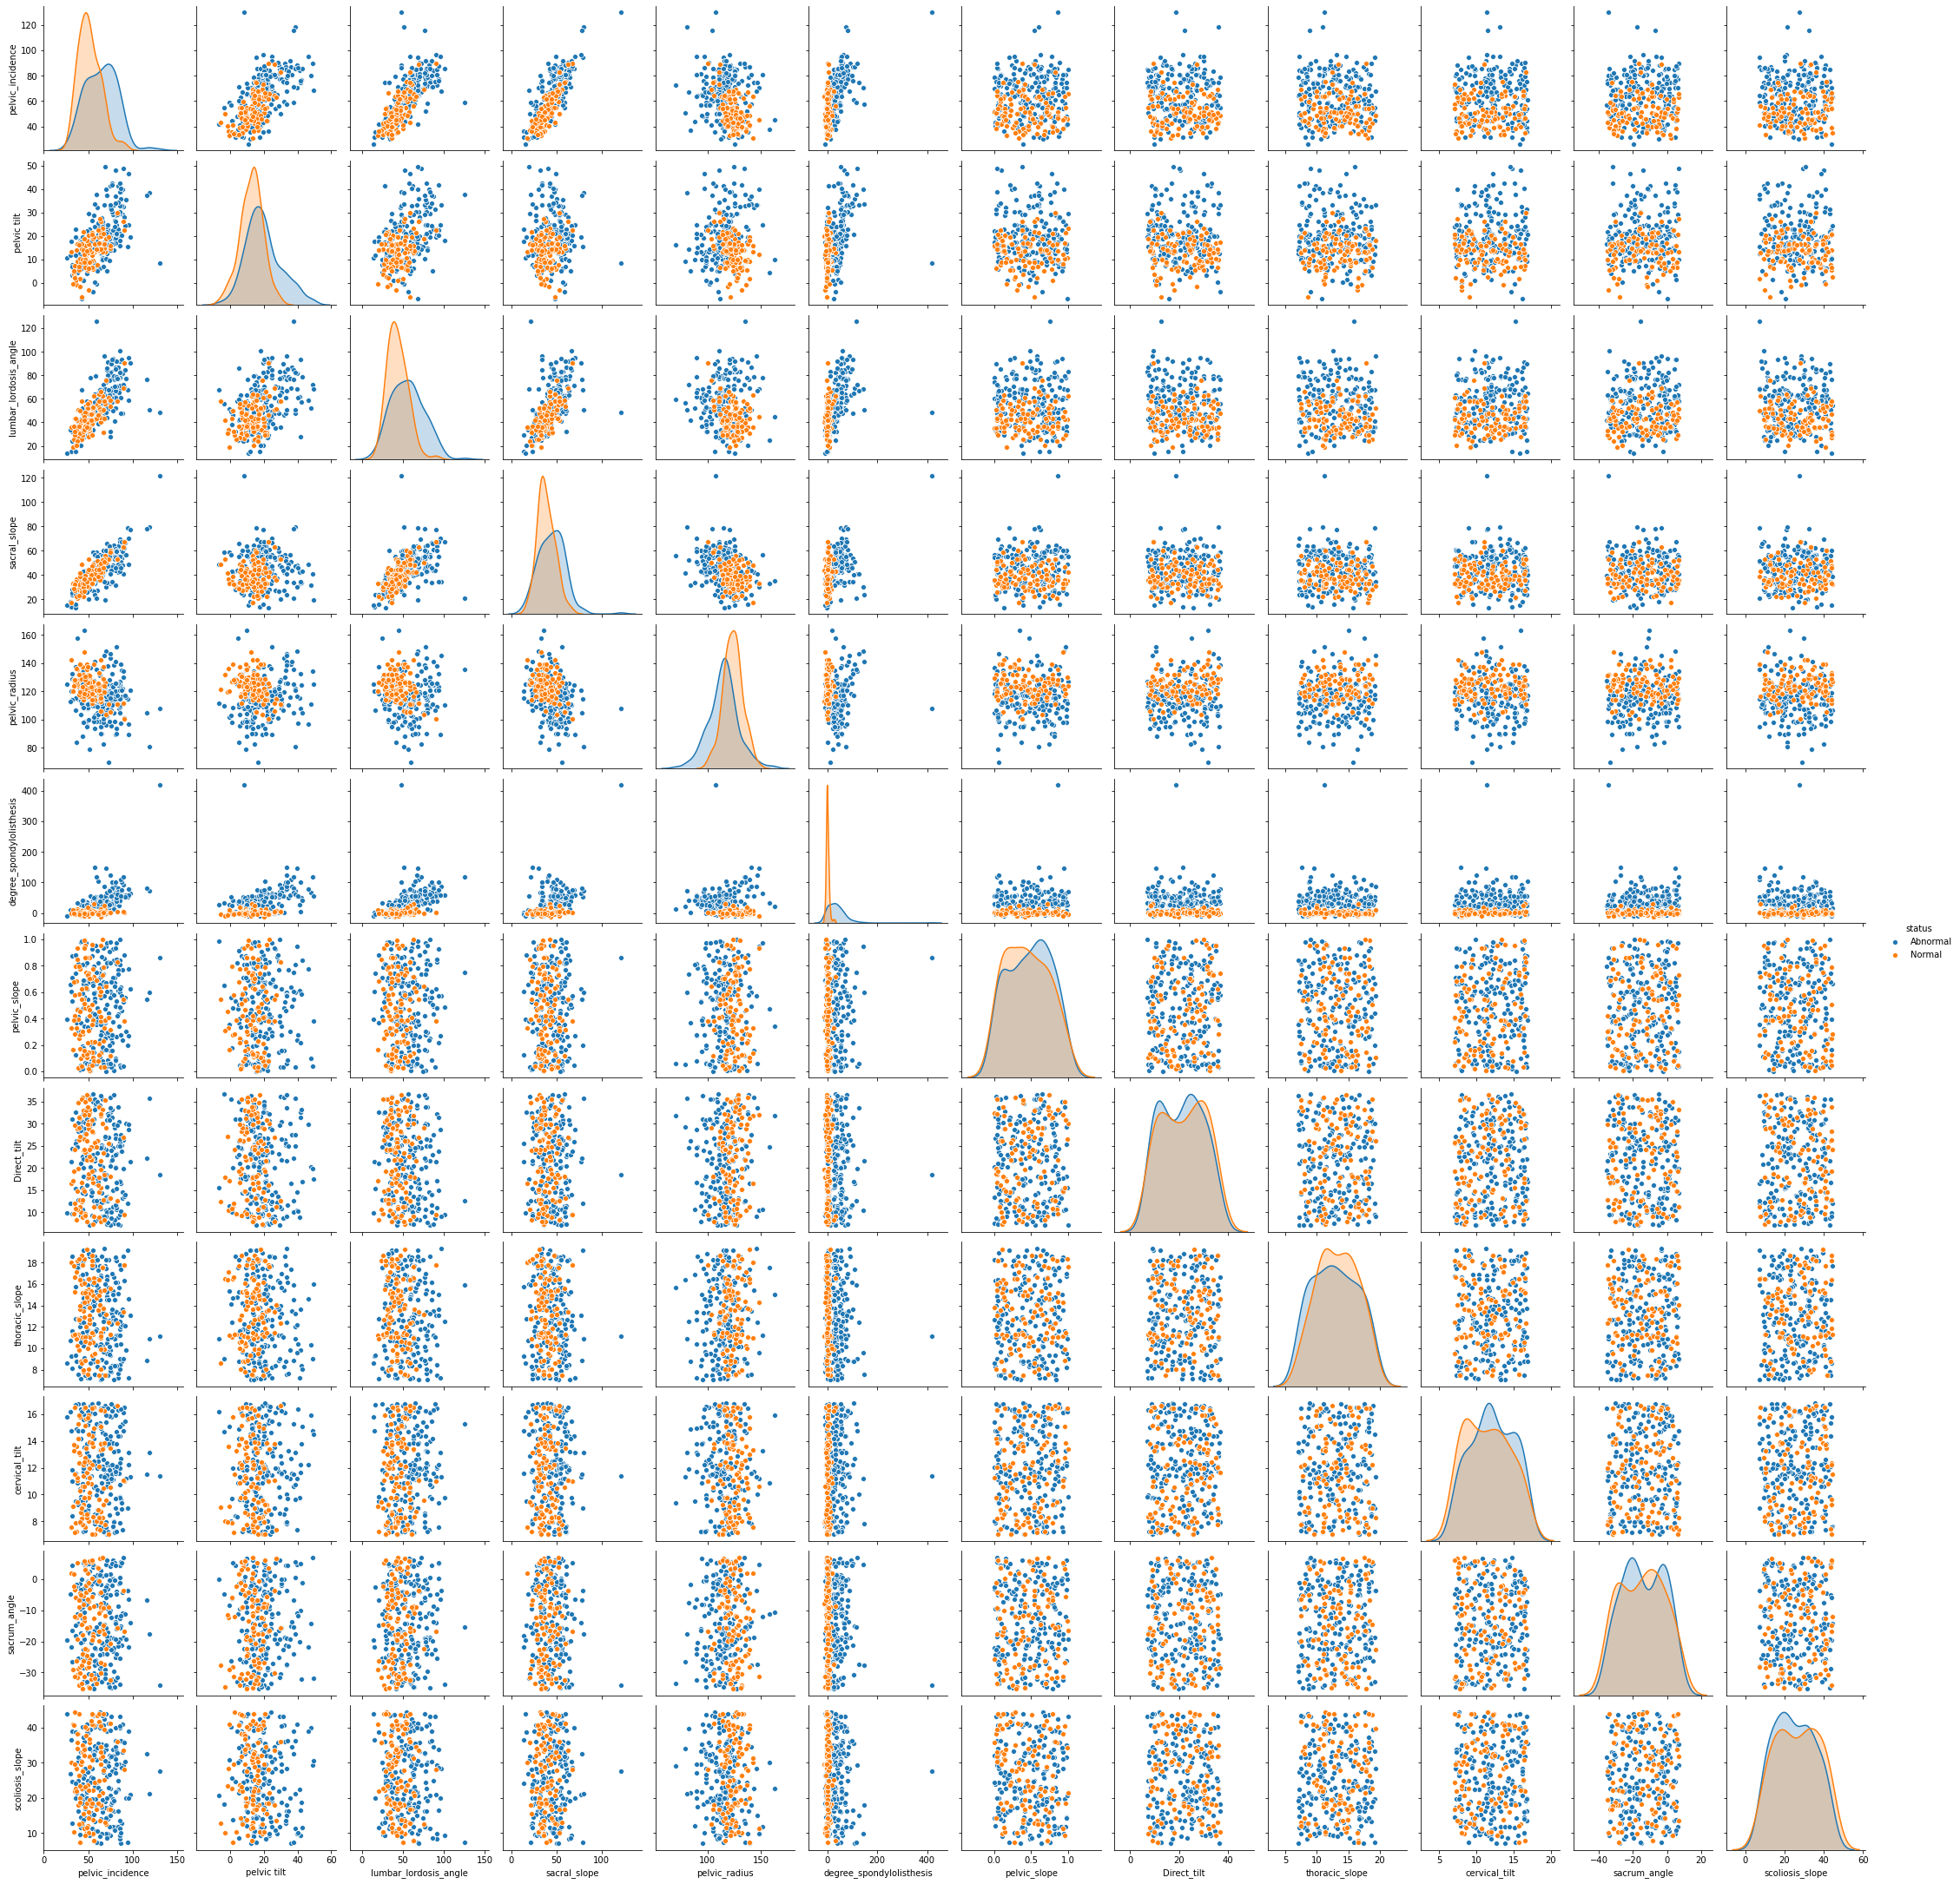

In [75]:
sns.pairplot(back_data, hue ='status')

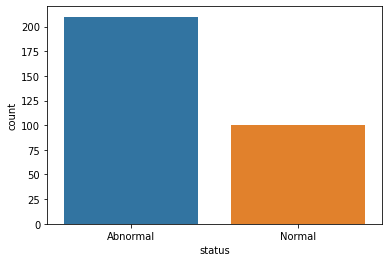

In [20]:
sns.countplot('status', data=back_data)
plt.show()

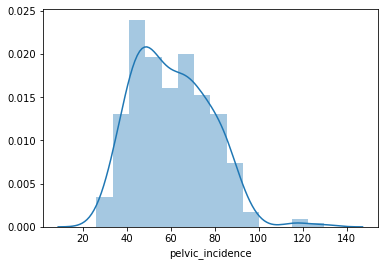

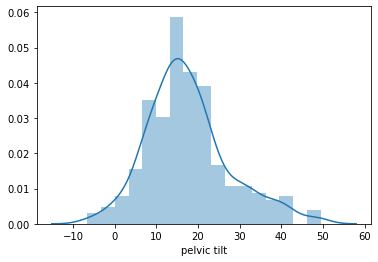

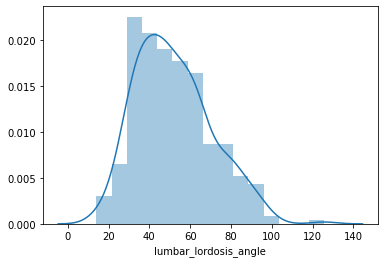

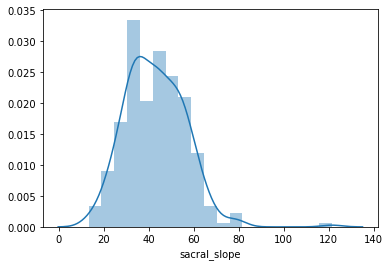

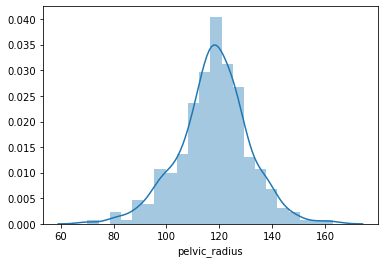

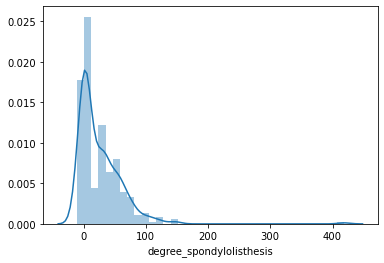

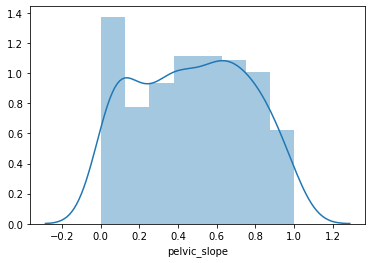

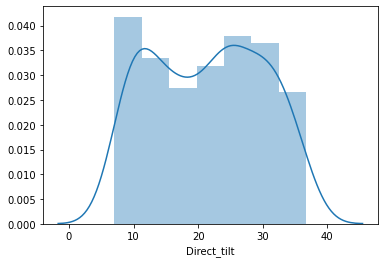

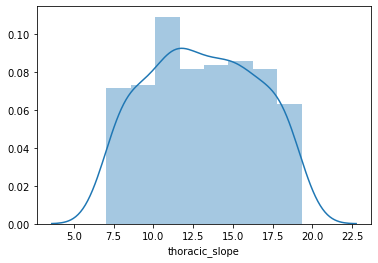

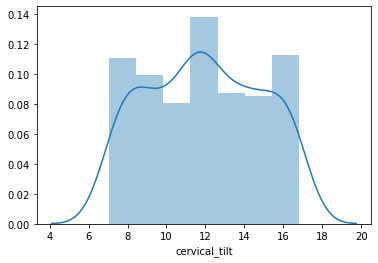

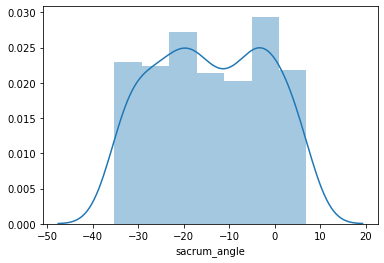

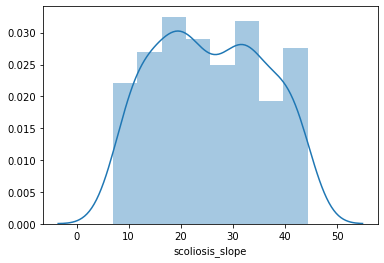

In [40]:
for i in back_data.columns[:-1]:
    sns.distplot(back_data[i])
    plt.show()

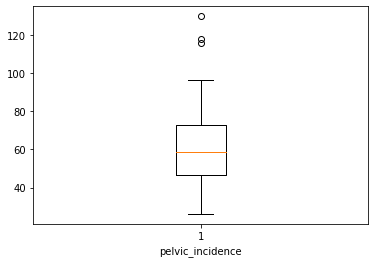

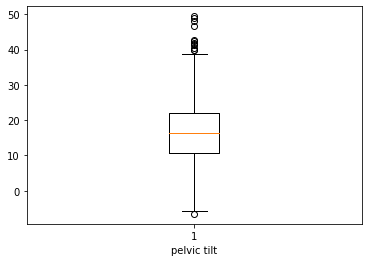

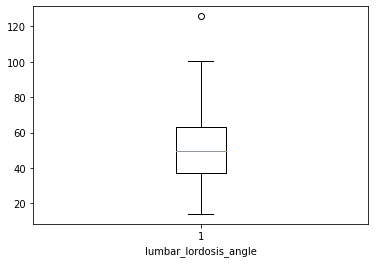

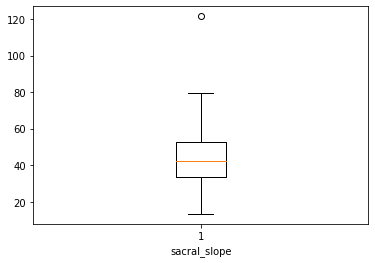

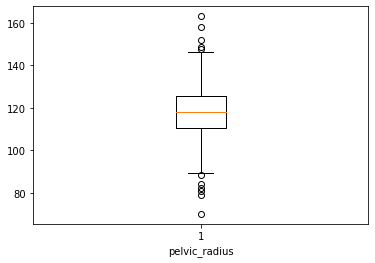

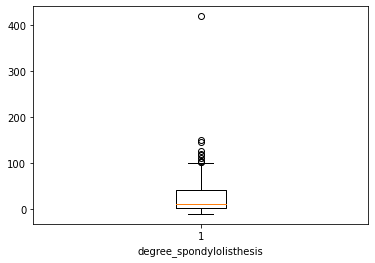

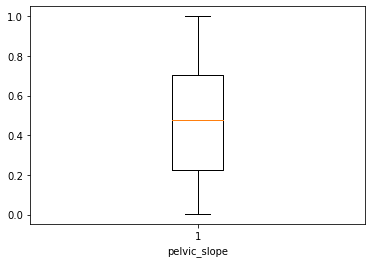

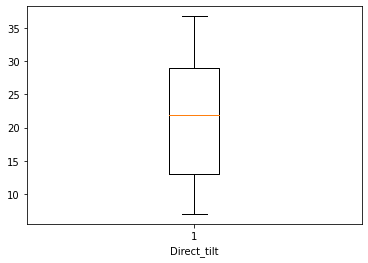

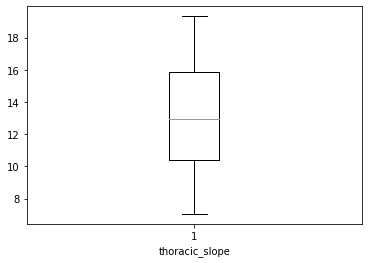

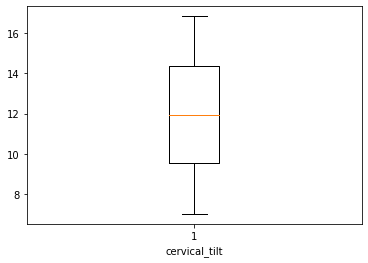

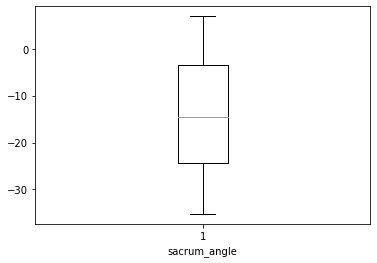

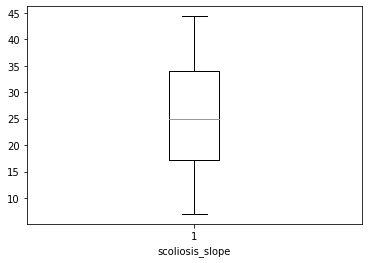

In [45]:
for i in back_data.columns[:-1]:
    plt.boxplot(back_data[i])
    plt.xlabel(i)
    plt.show()

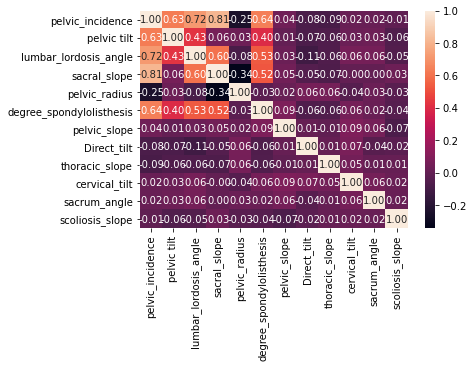

In [50]:
sns.heatmap(back_data.corr(), annot=True, fmt='.2f')
plt.show()

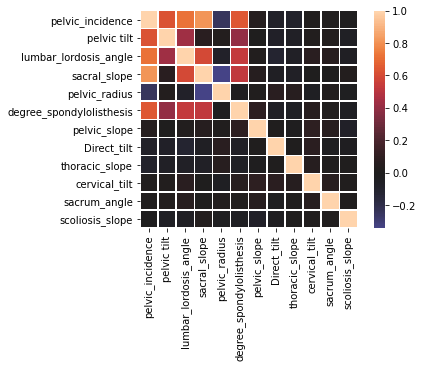

In [65]:
# Another way for corelation
corr_back = back_data.corr()

sns.heatmap(corr_back, center=0, square=True, linewidth=0.5)
plt.show()

In [67]:
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [69]:
back_data.groupby('status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528711,26.694019


In [70]:
back_data.groupby('status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


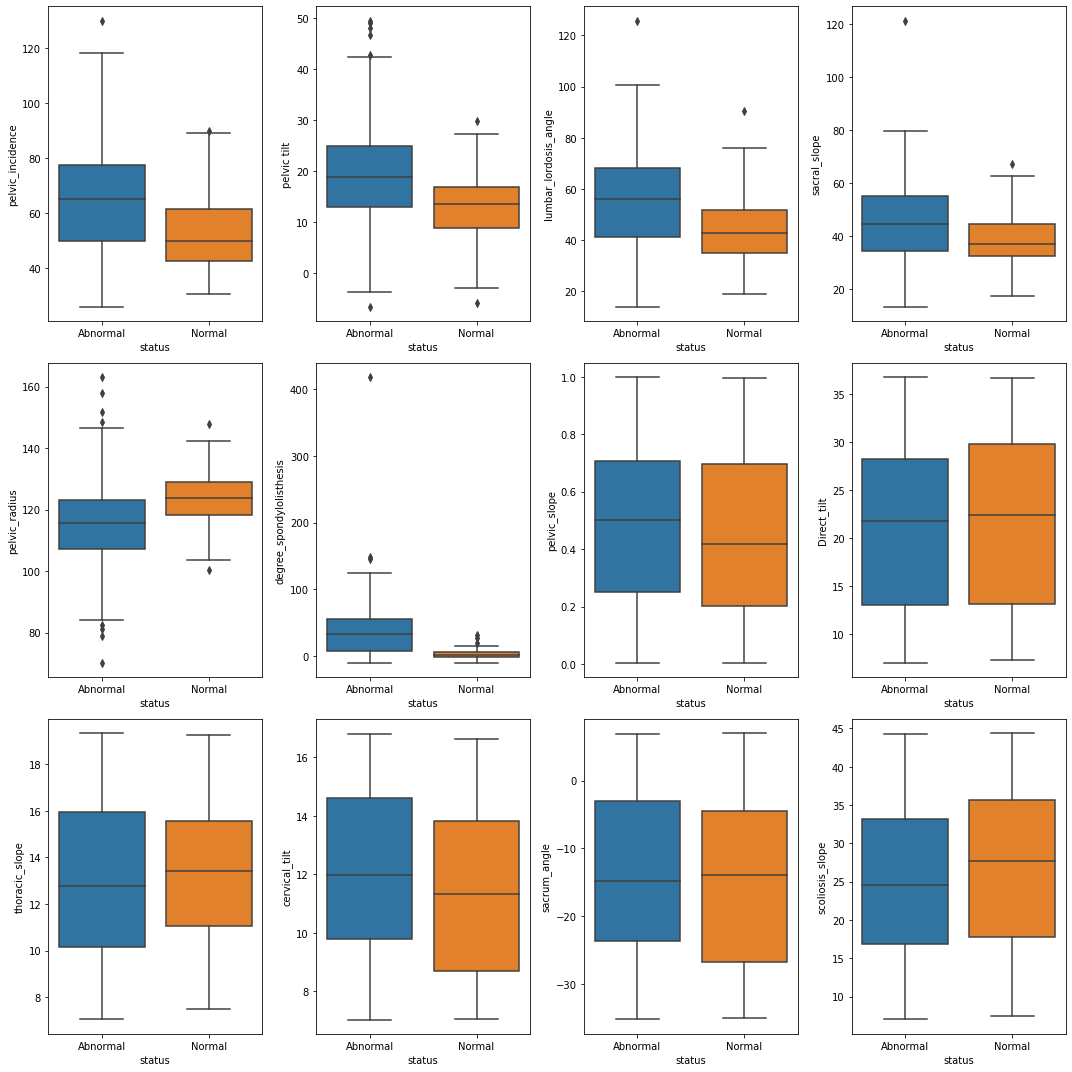

In [74]:
fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0, len(back_data.columns)-1):
    sns.boxplot(x='status', y=back_data.iloc[:,i], data = back_data, orient='v', ax=axes[i])
    
plt.tight_layout()
plt.show()

In [115]:
back_data.loc[back_data.status == 'Abnormal', 'status'] = 1
back_data.loc[back_data.status == 'Normal', 'status'] = 0

In [116]:
X = back_data.loc[:, back_data.columns != 'status']
y = back_data.loc[:, back_data.columns == 'status']

In [117]:
def data_preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    
    scaler.fit(X_train)
    
    # Applying the transformation to data
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)

In [118]:
def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return logreg

In [119]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X, y)

In [120]:
logreg_result = logistic_regression(X_train_scaled, y_train)

In [121]:
print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.876
Testing Score 0.817


In [122]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.473055
         Iterations: 35
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.248     
Dependent Variable:   y                 AIC:               229.3058  
Date:                 2021-02-27 14:29  BIC:               269.8646  
No. Observations:     217               Log-Likelihood:    -102.65   
Df Model:             11                LL-Null:           -136.45   
Df Residuals:         205               LLR p-value:       3.4943e-10
Converged:            0.0000            Scale:             1.0000    
No. Iterations:       35.0000                                        
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
x1   0.0814 11482676.3676  0.0000 1.0000 -22505632.0452 22505632.2080
x2   0.0765  6545064.3181  0.0000 1.0000 -12828090.2

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [125]:
# The model is failed to converge and one of the potential reason for that could be the multicolinarity between columns 1,2 and 4.
# Also the P value for these columns is 1 so we will run the model by removing these columns from X.
# it is also noticed that the column 1 is exact sum of column 2 and 4

In [174]:
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic_incidence', 'pelvic tilt', 'sacral_slope']]
X = back_data[cols_to_include]

In [128]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X, y)
logreg_result = logistic_regression(X_train_scaled, y_train)

print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.848
Testing Score 0.753


In [129]:
# The testing training scores have gone down

In [130]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.481933
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.234     
Dependent Variable: y                AIC:              227.1591  
Date:               2021-02-28 08:34 BIC:              257.5781  
No. Observations:   217              Log-Likelihood:   -104.58   
Df Model:           8                LL-Null:          -136.45   
Df Residuals:       208              LLR p-value:      8.5613e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.5434      0.2568    -2.1158    0.0344    -1.0468    -0.0400
x2    -0.9642      0.2080    -4.6364    0.0000    -1.3

In [133]:
# Considering only the independent variables which as P value lesser than 0.05
X_trim = X.loc[:,['lumbar_lordosis_angle', 'pelvic_radius', 'degree_spondylolisthesis']]

In [135]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim, y)
logreg_result = logistic_regression(X_train_scaled, y_train)

print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.857
Testing Score 0.774


In [136]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.498420
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.207     
Dependent Variable: y                AIC:              222.3145  
Date:               2021-02-28 08:59 BIC:              232.4542  
No. Observations:   217              Log-Likelihood:   -108.16   
Df Model:           2                LL-Null:          -136.45   
Df Residuals:       214              LLR p-value:      5.1622e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.4688      0.2426    -1.9325    0.0533    -0.9443     0.0067
x2    -0.9188      0.2037    -4.5100    0.0000    -1.3

In [137]:
# Assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# Assigning the string 'Normal' and 'Abnormal' to the status column respectively in place of 0 and 1
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

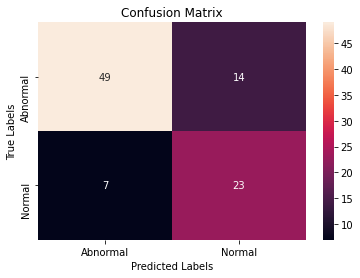

In [140]:
# Gauging the model accuracy

from sklearn .metrics import confusion_matrix
ax = plt.subplot()
labels = ['Abnormal', 'Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Abnormal', 'Normal'])
ax.yaxis.set_ticklabels(['Abnormal', 'Normal'])
plt.show()

In [145]:
recall = cm[0][0]/(cm[0][0]+cm[0][1])
recall

0.7777777777777778

In [146]:
precision = cm[0][0]/(cm[0][0] + cm[1][0])
precision

0.875

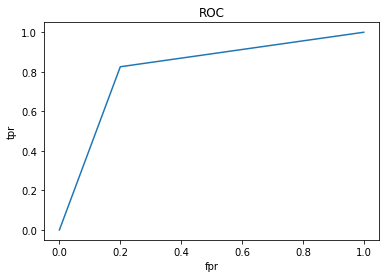

In [199]:
# Plotting ROC Curve
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
#metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.show()

### Processing by removing only 1 dependent column

In [173]:
back_data = pd.read_csv('Dataset_spine.csv')

del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope', 'status']


back_data.loc[back_data.status == 'Abnormal', 'status'] = 1
back_data.loc[back_data.status == 'Normal', 'status'] = 0

X = back_data.loc[:, back_data.columns != 'status']
y = back_data.loc[:, back_data.columns == 'status']

In [175]:
cols_to_include = [cols for cols in X.columns if cols not in ['pelvic tilt', 'sacral_slope']]
X = back_data[cols_to_include]

In [176]:
def data_preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    
    scaler.fit(X_train)
    
    # Applying the transformation to data
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)

def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return logreg

In [177]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess_min_max(X, y)
logreg_result = logistic_regression(X_train_scaled, y_train)

print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.742
Testing Score 0.688


In [178]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.298173
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.526     
Dependent Variable: y                AIC:              149.4071  
Date:               2021-02-28 14:51 BIC:              183.2061  
No. Observations:   217              Log-Likelihood:   -64.704   
Df Model:           9                LL-Null:          -136.45   
Df Residuals:       207              LLR p-value:      1.9597e-26
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1       2.1644     2.6388    0.8202   0.4121    -3.0076     7.3363
x2      -7.3708     3.1319   -2.3535   0.0186   -13.5091 

In [ ]:
# Rest is going to be same if we keep the 3 variables with p < 0.05

## Classification using min-max scaling

In [183]:
back_data = pd.read_csv('Dataset_spine.csv')

In [184]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope', 'status']

In [185]:
back_data.loc[back_data.status == 'Abnormal', 'status'] = 1
back_data.loc[back_data.status == 'Normal', 'status'] = 0

X = back_data.loc[:, back_data.columns != 'status']
y = back_data.loc[:, back_data.columns == 'status']

In [186]:
def data_preprocess_min_max(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    
    scaler.fit(X_train)
    
    # Applying the transformation to data
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    y_train = y_train.astype('int')
    y_test = y_test.astype('int')
    
    return(train_scaled, test_scaled, y_train, y_test)

def logistic_regression(x,y):
    logreg = LogisticRegression().fit(x,y)
    return logreg

In [187]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess_min_max(X, y)
logreg_result = logistic_regression(X_train_scaled, y_train)

print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.765
Testing Score 0.731


In [188]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.249223
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.604     
Dependent Variable: y                AIC:              132.1630  
Date:               2021-02-28 15:07 BIC:              172.7217  
No. Observations:   217              Log-Likelihood:   -54.081   
Df Model:           11               LL-Null:          -136.45   
Df Residuals:       205              LLR p-value:      1.4262e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -21.0871    10.0725   -2.0935   0.0363   -40.8287    -1.3454
x2      15.2298     4.6724    3.2596   0.0011     6.0722 

In [190]:
# Processing with only the variables with P < 0.05
X_trim = X.loc[:,['pelvic_incidence', 'pelvic tilt', 'pelvic_radius', 'degree_spondylolisthesis']]

In [191]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim, y)
logreg_result = logistic_regression(X_train_scaled, y_train)

print('Training Score {:.3f}'.format(logreg_result.score(X_train_scaled, y_train)))
print('Testing Score {:.3f}'.format(logreg_result.score(X_test_scaled, y_test)))

Training Score 0.857
Testing Score 0.817


In [192]:
logit_model = sm.Logit(y_train, X_train_scaled)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.488533
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.223     
Dependent Variable: y                AIC:              220.0235  
Date:               2021-02-28 15:11 BIC:              233.5431  
No. Observations:   217              Log-Likelihood:   -106.01   
Df Model:           3                LL-Null:          -136.45   
Df Residuals:       213              LLR p-value:      3.8211e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
--------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
--------------------------------------------------------------------
x1    -0.7841      0.3038    -2.5806    0.0099    -1.3795    -0.1886
x2     0.5537      0.2464     2.2476    0.0246     0.0

In [193]:
# Assigning the model predicted values to y_pred
y_pred = logreg_result.predict(X_test_scaled)

# Assigning the string 'Normal' and 'Abnormal' to the status column respectively in place of 0 and 1
y_pred_string = y_pred.astype(str)
y_pred_string[np.where(y_pred_string == '0')] = 'Normal'
y_pred_string[np.where(y_pred_string == '1')] = 'Abnormal'

y_test_string = y_test.astype(str)
y_test_string[np.where(y_test_string == '0')] = 'Normal'
y_test_string[np.where(y_test_string == '1')] = 'Abnormal'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


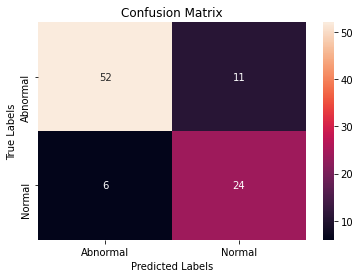

In [194]:
# Gauging the model accuracy

from sklearn .metrics import confusion_matrix
ax = plt.subplot()
labels = ['Abnormal', 'Normal']
cm = confusion_matrix(y_test_string, y_pred_string, labels)
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Abnormal', 'Normal'])
ax.yaxis.set_ticklabels(['Abnormal', 'Normal'])
plt.show()

In [195]:
recall = cm[0][0]/(cm[0][0]+cm[0][1])
recall

0.8253968253968254

In [196]:
precision = cm[0][0]/(cm[0][0] + cm[1][0])
precision

0.896551724137931

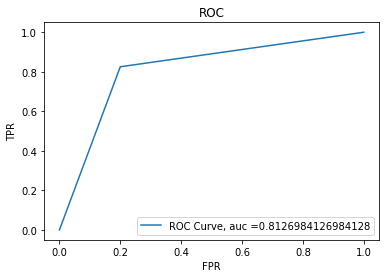

In [204]:
# Plotting ROC Curve
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = 'ROC Curve, auc ='+str(auc) )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

In [205]:
threshholds

array([2, 1, 0])